<a href="https://colab.research.google.com/github/viandmarket25/Automatic_tagging_of_clothing_in_E-Commerce/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification
import json


In [1]:
!pip install transformers

In [3]:

with open('sentiment-data.json', 'r') as json_file:
    sentiment_data = json.load(json_file)

# Loop over the keys of the dictionary
for key in sentiment_data:
    print(key)

# Define the 6 classes
classes=[]
# Loop over the keys of the dictionary
for key in sentiment_data:
    classes.append(key)
    #print(key)

text=[]

max_d=500
epochs=50
# Access data associated with each key
for key in sentiment_data:
    data = sentiment_data[key]
    dc=0
    newd=[]
    for d in data:
        if dc<max_d:
            newd.append(d)
            dc+=1

    # use new and general length for all data llist
    text=text+newd
    #print(f"Key: {key}, Data: {data}")


sadness
anger
love
surprise
fear
happy


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

Epoch 1/50
94/94 [==============================] - 55s 294ms/step - loss: 1.7975 - accuracy: 0.1600
Epoch 2/50
94/94 [==============================] - 24s 255ms/step - loss: 1.7973 - accuracy: 0.1593
Epoch 3/50
94/94 [==============================] - 22s 230ms/step - loss: 1.7516 - accuracy: 0.2217
Epoch 4/50
94/94 [==============================] - 22s 230ms/step - loss: 0.8417 - accuracy: 0.7340
Epoch 5/50
94/94 [==============================] - 21s 225ms/step - loss: 0.3385 - accuracy: 0.9120
Epoch 6/50
94/94 [==============================] - 21s 227ms/step - loss: 0.2121 - accuracy: 0.9417
Epoch 7/50
94/94 [==============================] - 22s 236ms/step - loss: 0.1581 - accuracy: 0.9547
Epoch 8/50
94/94 [==============================] - 22s 229ms/step - loss: 0.1193 - accuracy: 0.9640
Epoch 9/50
94/94 [==============================] - 21s 225ms/step - loss: 0.0967 - accuracy: 0.9740
Epoch 10/50
94/94 [==============================] - 21s 226ms/step - loss: 0.0763 - accura

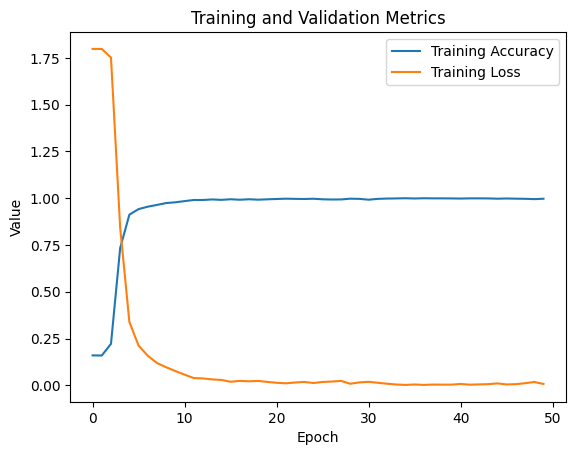

Enter a text for sentiment prediction (or 'exit' to quit): I am happy
1/1 [==============================] - 1s 1s/step
The sentiment of 'I am happy' is 'happy'


KeyboardInterrupt: ignored

In [4]:

# Create a DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Tokenize the text
encoded_text = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors='tf')

# Convert labels to numerical format
labels = [classes.index(cls) for cls in classes for _ in range(max_d)]

# Create a TensorFlow dataset
dataset = tf.data.Dataset.from_tensor_slices((encoded_text['input_ids'], labels)).shuffle(len(text)).batch(32)

# Split dataset into train and validation sets
train_size = int(0.8 * len(text))
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

# Create a DistilBERT model
model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(classes))


# Save the trained model
#model.save_pretrained("distil-senti-bert")
#tokenizer.save_pretrained("distil-senti-bert")

# Define the optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)

# Save the trained model
model.save_pretrained("distil-senti-bert")
tokenizer.save_pretrained("distil-senti-bert")

# Plot accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
#  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.savefig('metrics_plot.png')
plt.show()

# Enter the while loop for user input and prediction
while True:
    input_text = input("Enter a text for sentiment prediction (or 'exit' to quit): ")
    if input_text == 'exit':
        break
    # Tokenize the input text
    input_encoded = tokenizer.encode_plus(input_text, padding=True, truncation=True, max_length=512, return_tensors='tf')
    # Make prediction
    prediction = model.predict(input_encoded['input_ids'])[0]
    predicted_class = classes[prediction.argmax()]
    print(f"The sentiment of '{input_text}' is '{predicted_class}'")


In [8]:
!zip -r distil-senti-bert.zip distil-senti-bert


  adding: distil-senti-bert/ (stored 0%)
  adding: distil-senti-bert/vocab.txt (deflated 53%)
  adding: distil-senti-bert/special_tokens_map.json (deflated 42%)
  adding: distil-senti-bert/tf_model.h5 (deflated 8%)
  adding: distil-senti-bert/config.json (deflated 51%)
  adding: distil-senti-bert/tokenizer_config.json (deflated 45%)


In [9]:
from google.colab import files
files.download('distil-senti-bert.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>